In [159]:
################## upload packages needed ###########################
using Plots,DelimitedFiles,Revise
includet("Function_phase_diagram_CR.jl")
import .Module_phase_diagram_CR


**Code used to generate the data plotted in Figure 6 of the paper "Counterion-controlled phase equilibria in a charge-regulated polymer solution"**

We compute the (φP,φCL)-phase diagram for charge-regulating polymers.

*Variables:*

- φP: volume fraction of polymer
- φCL: volume fraction of counter-ions
- φH: volume fraction of co-ions (H+)
- Q: mean charge distribution
- S: standard deviation charge distribution
- output: matrix containing composition of coexisting phases [I: dilute phase; II: condensed phase]

(columns' header)

output=[φP_I φCL_I φH(φP_I,φCL_I) Q(φP_I,φCL_I) S(φP_I,φCL_I) φP_II φCL_II φH(φP_II,φCL_II) Q(φP_II,φCL_II) S(φP_II,φCL_II)] 

*Other parameters:*

- α,η: charge regulation parameters
- χ: Flory--Huggins parameter
- Nz: number of monomers on the polymer chain with binding site
- Nmono: total number of monomers on the polymer chain

**NOTES:**
(1) The algorithm can compute phase diagrams for any value of η (other parameters set to the default values in the paper) but it might fail when changing other parameters. This is simply because the initial guess for the Netwon's is not sufficiently good. This can be fix by choosing a better initial guess. Please contact me if help is needed.
(2) When the message "*output computed correctly*" is printed, any other error message can be neglected. The phase diagram has been computed correctly

In [162]:
parameters =(η=-2.,α=-6.5,Nz=20,χ=0.95,λ=26.68,Nmono=100); # list model parameters
output= Module_phase_diagram_CR.compute_binodal(parameters);  # main computing phase diagram

computing binodal



┌ Error: Failure to converge with given tolerances.
└ @ BifurcationKit C:\Users\celor\.julia\packages\BifurcationKit\QYf3b\src\continuation\Contbase.jl:73
┌ Error: Failure to converge with given tolerances.
└ @ BifurcationKit C:\Users\celor\.julia\packages\BifurcationKit\QYf3b\src\continuation\Contbase.jl:73
┌ Error: Failure to converge with given tolerances.
└ @ BifurcationKit C:\Users\celor\.julia\packages\BifurcationKit\QYf3b\src\continuation\Contbase.jl:73


preparing output



In [ ]:
######################### SAVE the SOLUTION ###################
dir="phase_diagram_CR/"
try
    mkdir(dir)
catch
    println("Folder already exists")
end

open(dir*"solution_eta_"*string(parameters.η)*"_chi_"*string(parameters.χ)*"alpha_"*string(par_mod.α)*".txt","w") do io
    writedlm(io,output,',');
end

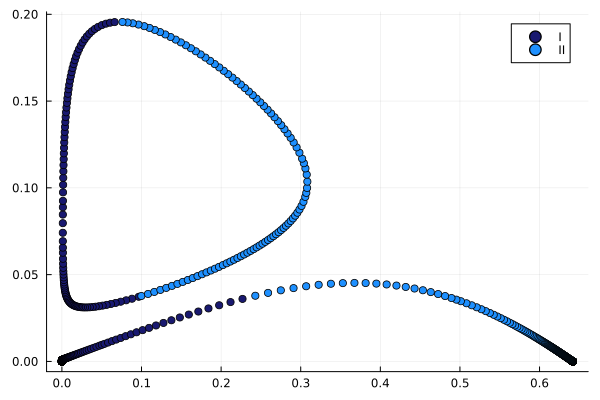

In [158]:
######################### PLOT of the PHASE DIAGRAM ###################

scatter([output[:,1]],[output[:,2]],color=:midnightblue,label=:"I")
scatter!([output[:,6]],[output[:,7]],color=:dodgerblue,label=:"II")